# Face identification problem

**Task**
Challenge yourself with image classification task for solving face identification problem on ORL dataset available here.

**Goal**
The aim of this project is listed (but not limited to) below:
    - Familiarize yourself with EDA (Exploratory Data Analysis) technique on the concrete example with dataset of people’ faces.
    - Implement simplest classification algorithm with Python language.
    - Investigate general techniques of normalization and optimization.
    - Experience yourself in report with detailed explanation of applied strategy and the achieved results.
You can familiarize yourself with the common methods in CV (Computer Vision), image processing, and face recognition on the example here.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import h5py
# import scipy
# from scipy import ndimage
from PIL import Image as PGM

%matplotlib inline

In [2]:
# model const & parameters 
faces_folder = 'att_faces/'
person_count = 40
faces_count = 10
train_percent = 80.0

faces_count_train = round (faces_count * train_percent / 100)
faces_count_verif = faces_count - faces_count_train
print ("Train faces count = " + str(faces_count_train))
print ("Verif faces count = " + str(faces_count_verif))

Train faces count = 8
Verif faces count = 2


In [3]:
def load_datasets ():
    Xt, Yt, Xv, Yv = ([], [], [], [])
    for person in range(person_count):
        for faces in range(faces_count):
            file_name = faces_folder + "s" + str(person+1) + "/" + str(faces+1) + ".pgm"
            img = np.array(PGM.open(file_name))
            if (faces < faces_count_train):
                Xt.append(img)
                Yt.append(person+1)
            else:
                Xv.append(img)
                Yv.append(person+1)
    
    return np.asarray(Xt), np.asarray(Yt), np.asarray(Xv), np.asarray(Yt)

'''
    files=glob.glob(faces_folder + "s*/*.pgm")   # list of filenames   import glob
    img=np.array(PGM.open(faces_folder + "s" + str(person+1) + "/" + str(faces+1) + ".pgm"))
    print(img.shape)
    print(img)
    plt.imshow(img, cmap='hot')
    print(np.asarray(Xt).shape)
    plt.imshow(np.asarray(Xt)[10], cmap='hot')
'''

# not use
def read_pgm_file (file_name):
    """Return a raster of integers from a PGM as a list of lists """
    assert file_name.readline() == 'P5\n'
    (width, height) = [int(i) for i in file_name.readline().split()]
    depth = int(file_name.readline())
    assert depth <= 255
    raster = []
    for y in range(height):
        row = []
        for y in range(width):
            row.append(ord(file_name.read(1)))
        raster.append(row)
    return raster

In [4]:
def vector_to_image(vector):
    image = vector.reshape(112,92)
    return image

def image_display (x,y,idx):
    image = vector_to_image(x[idx])
    plt.imshow(image, cmap='hot')
    plt.title("id = " + str(y[idx]))

In [5]:
# Loading the data (faces)
X_train_orig, Y_train_orig, X_verif_orig, Y_verif_orig = load_datasets()

In [6]:
print ("X_train_orig shape: " + str(X_train_orig.shape))
print ("Y_train_orig shape: " + str(Y_train_orig.shape))
print ("X_verif_orig shape: " + str(X_verif_orig.shape))
print ("Y_verif_orig shape: " + str(Y_verif_orig.shape))

X_train_orig shape: (320, 112, 92)
Y_train_orig shape: (320,)
X_verif_orig shape: (80, 112, 92)
Y_verif_orig shape: (320,)


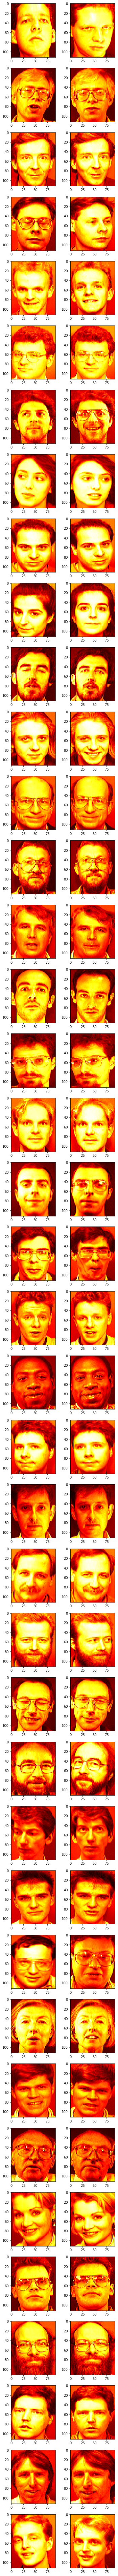

Wall time: 4.69 s


In [7]:
%%time
fig = plt.figure(figsize=(faces_count_verif*X_verif_orig.shape[2]/32, person_count*X_verif_orig.shape[1]/32)) 
for i in range(X_verif_orig.shape[0]):
    fig.add_subplot(person_count, faces_count_verif, i+1)
    plt.imshow(X_verif_orig[i], cmap='hot')
plt.show()

In [8]:
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_verif = X_verif_orig.reshape(X_verif_orig.shape[0], -1)
Y_train = Y_train_orig
Y_verif = Y_verif_orig

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_verif shape: " + str(X_verif.shape))
print ("Y_verif shape: " + str(Y_verif.shape))
print ("sanity check after reshaping: ")
print (X_train_orig[10, 0, 0:5])
print (X_train[10, 0:5])

X_train shape: (320, 10304)
Y_train shape: (320,)
X_verif shape: (80, 10304)
Y_verif shape: (320,)
sanity check after reshaping: 
[30 37 35 33 35]
[30 37 35 33 35]


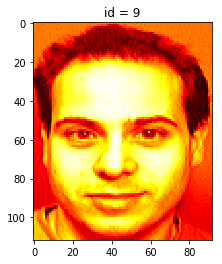

In [18]:
X_train  = X_train/255.
X_verif  = X_verif/255.
image_display(X_train,Y_train,71)

Для каждого из тестовых изображений лиц [80] посчитать MSE для изображений из train set [320], в результате чего будет получен вектор из 320-и значений. 
Затем, найти индекс миинмального значения в этом векторе и по этому индексу достать из вектора Y (который будет содержать индексы пользователей) id пользователя и сравнить с настоящим id, который хранится в векторе y из 80 элементов

mse = ((A - B)^2).mean(axis=ax)
mse = (np.square(A - B)).mean(axis=ax)
with ax=0 the average is performed along the row, for each column, returning an array
with ax=1 the average is performed along the column, for each row, returning an array
with ax=None the average is performed element-wise along the array, returning a scalar value

In [19]:
# calc MSE [80 320]
# mse = ((A - B)**2).mean(axis=ax)